In [1]:
from IPython.lib.display import Audio
import librosa
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import soundfile as sf 
import noisereduce as nr
import librosa.display
import matplotlib.pyplot as plt
import os

C:\Users\ideapad 330\Anaconda3\envs\mydashenv\lib\site-packages\noisereduce\noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
bird = pd.read_csv('metadata.csv')
bird.head()

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"doñana visitable, sevilla, andalucía",37.1058,-6.2577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"arroyo algarbe, hinojos, huelva, andalucía",37.3006,-6.3783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-317951.mp3
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-508571.mp3
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-448534.mp3
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, north-eastern part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-373414.mp3


In [3]:
bird.columns

Index(['Recording_ID', 'Genus', 'Specific_epithet', 'Subspecies',
       'English_name', 'Recordist', 'Country', 'Locality', 'Latitude',
       'Longitude', 'Vocalization_type', 'Audio_file', 'License', 'Url',
       'Quality', 'Time', 'Date', 'Altitude', 'file.name', 'Spectrogram_small',
       'Spectrogram_med', 'Spectrogram_large', 'Spectrogram_full', 'Length',
       'Uploaded', 'Other_species', 'Remarks', 'Bird_seen', 'Playback_used',
       'Other_species1', 'Other_species2', 'Other_species3', 'Other_species4',
       'Other_species5', 'Other_species6', 'Other_species7', 'Other_species8',
       'Other_species9', 'Other_species10', 'Other_species11',
       'Other_species12', 'Other_species13', 'Other_species14',
       'Other_species15', 'Other_species16', 'Other_species17',
       'Other_species18', 'Other_species19', 'Other_species20',
       'Other_species21', 'Other_species22', 'Other_species23',
       'Other_species24', 'Other_species25', 'Other_species26',
       'Other_s

In [4]:
bird['Genus'].unique()

array(['Sonus', 'Fringilla', 'Parus', 'Turdus', 'Sylvia', 'Emberiza',
       'Phylloscopus', 'Luscinia', 'Strix', 'Carduelis', 'Erithacus',
       'Chloris', 'Acrocephalus', 'Oriolus', 'Troglodytes', 'Bubo',
       'Ficedula', 'Linaria', 'Alauda', 'Phoenicurus', 'Aegolius',
       'Cyanistes', 'Hirundo', 'Locustella', 'Cuculus', 'Loxia',
       'Carpodacus', 'Athene', 'Crex', 'Periparus', 'Hippolais',
       'Pyrrhula', 'Caprimulgus', 'Glaucidium'], dtype=object)

In [5]:
bird['Vocalization_type'].value_counts()

male, song                               1568
call, male, song                          148
call, female, male, song                   91
call, female, flight call, male, song      55
adult, male, song                          52
                                         ... 
begging call, female, male, song            1
Mimicry, male, song                         1
aberrant, juvenile, male, song              1
alarm call, call, male, song                1
female song and call                        1
Name: Vocalization_type, Length: 118, dtype: int64

In [6]:
#Find records that are not Other specices in clip.
B = bird.loc[:,'Other_species1':'Other_species30'].isnull().all(axis=1)
B

0       False
1       False
2       False
3       False
4       False
        ...  
2145    False
2146     True
2147     True
2148     True
2149     True
Length: 2150, dtype: bool

In [7]:
B.value_counts()

True     1488
False     662
dtype: int64

In [8]:
#Explore clip length
bird['Length']

0       14:31
1       10:52
2        2:08
3       21:37
4        5:33
        ...  
2145     4:16
2146     0:31
2147     0:58
2148     0:40
2149     2:12
Name: Length, Length: 2150, dtype: object

In [9]:
#tranform clip length
Time = pd.to_datetime(bird['Length'],format= '%M:%S')
Time

0      1900-01-01 00:14:31
1      1900-01-01 00:10:52
2      1900-01-01 00:02:08
3      1900-01-01 00:21:37
4      1900-01-01 00:05:33
               ...        
2145   1900-01-01 00:04:16
2146   1900-01-01 00:00:31
2147   1900-01-01 00:00:58
2148   1900-01-01 00:00:40
2149   1900-01-01 00:02:12
Name: Length, Length: 2150, dtype: datetime64[ns]

In [10]:
#Filter time
T = Time.dt.minute*60 + Time.dt.second<134
T

0       False
1       False
2        True
3       False
4       False
        ...  
2145    False
2146     True
2147     True
2148     True
2149     True
Name: Length, Length: 2150, dtype: bool

In [11]:
#Filter by T and B
B_selected = bird[(T) & (B)]
B_selected.head()

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
44,168175,Fringilla,coelebs,NaN,Common Chaffinch,david m,United Kingdom,"Ryedale District (near West Lutton), North Yo...",54.1248,-0.5719,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fringilla coelebs,mp3//Fringilla-coelebs-168175.mp3
46,512407,Fringilla,coelebs,coelebs,Common Chaffinch,Jarek Matusiak,Poland,KPN,52.3724,20.6421,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fringilla coelebs,mp3//Fringilla-coelebs-512407.mp3
49,278175,Fringilla,coelebs,NaN,Common Chaffinch,José Carlos Sires,Spain,"observatorio de la rocina, el rocío, huelva, a...",37.1242,-6.4966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fringilla coelebs,mp3//Fringilla-coelebs-278175.mp3
50,167197,Fringilla,coelebs,NaN,Common Chaffinch,david m,United Kingdom,"Ryedale District (near West Lutton), North Yo...",54.1248,-0.5720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fringilla coelebs,mp3//Fringilla-coelebs-167197.mp3
51,463626,Fringilla,coelebs,solomkoi,Common Chaffinch,Kucherenko Volodymyr,Ukraine,Simferopol,44.9406,34.1329,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fringilla coelebs,mp3//Fringilla-coelebs-463626.mp3


In [12]:
#B_selected.to_csv('selected_bird.csv')

In [13]:
#Load data
sound, sr = librosa.load('sound/104377.wav')

In [14]:
Audio(data=sound, rate=sr)

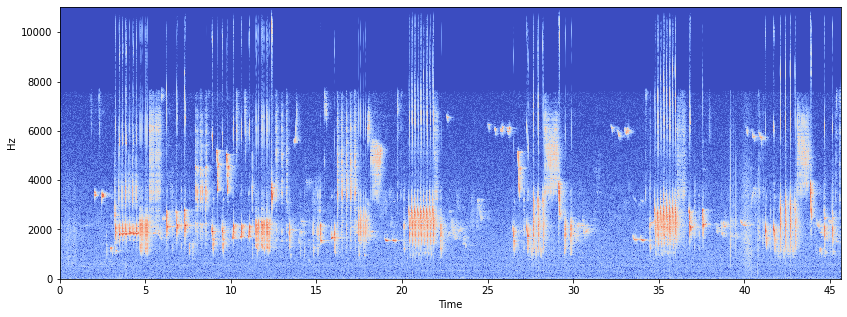

In [15]:
#Display STFT of sound
X = librosa.stft(sound)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
A = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.savefig('before_clean.png')

In [16]:
#reduced noise
reduced_noise = nr.reduce_noise(audio_clip=sound, noise_clip=sound[0:25000],verbose=False)

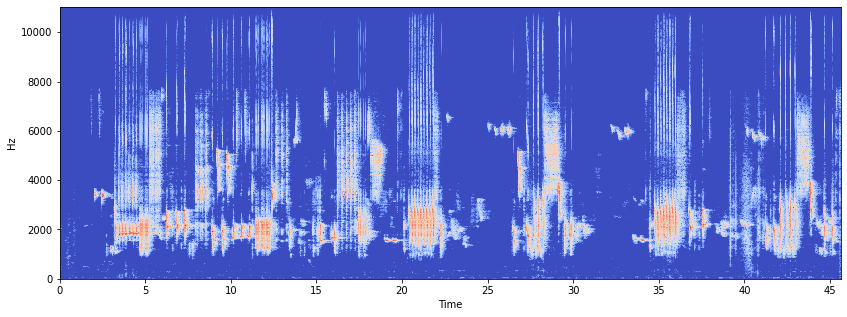

In [17]:
#Display STFT of cleaned_sound
X = librosa.stft(reduced_noise)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.savefig('after_clean.png')

In [18]:
def save_STFT(load_path, save_path, ret = False):
    #load
    x, sr = librosa.load(load_path)
    
    # noise reduction
    reduced_noise = nr.reduce_noise(audio_clip=x, noise_clip=x[0:25000],verbose=False)
    
    #trimming
    trimmed, index = librosa.effects.trim(reduced_noise, top_db=20,frame_length=512, hop_length=64)
    
    # extract features
    stft = np.abs(librosa.stft(trimmed, n_fft=512, hop_length=256,win_length=512))
    
    np.save(save_path, stft)

In [19]:
#Save vector array
# for name in os.listdir('sound'):
#     ID, _ = name.split('.')
#     src_load = "sound/"+ name
#     src_save = "stft/" + f"{ID}.npy"
#     save_STFT(src_load, src_save)

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
DF = B_selected[['Recording_ID','Species','Genus']]
DF = DF.reset_index()
DF.head()

,index,Recording_ID,Species,Genus
0,44,168175,Fringilla coelebs,Fringilla
1,46,512407,Fringilla coelebs,Fringilla
2,49,278175,Fringilla coelebs,Fringilla
3,50,167197,Fringilla coelebs,Fringilla
4,51,463626,Fringilla coelebs,Fringilla


In [22]:
#Save array of vector array
# L = []
# for name in DF.Recording_ID:
#     ID = f'{name}'+'.npy'
#     A = np.load(f'selected_bird/{ID}')
#     A = np.mean(A[0:25000], axis=1)
#     L.append(A)
# np.save('selected_bird/Bird_stft.npy',L)

In [23]:
DF.shape

(1001, 4)

In [24]:
#Select the first 5th Genus  
K = DF['Genus'].unique()[:5]
DF = DF[['Recording_ID','Genus']][DF.Genus.isin(K)]

In [25]:
#Create dummies variable
X = DF['Recording_ID']
y = pd.get_dummies(DF.Genus)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
X_b = pd.DataFrame(np.load('selected_bird/Bird_stft.npy'))

In [28]:
X_b.shape

(1001, 257)

In [29]:
X_train = X_b.iloc[X_train.index]
X_test = X_b.iloc[X_test.index]

In [30]:
early_stopping = callbacks.EarlyStopping(min_delta=0.001, patience=5,  restore_best_weights=True)
num_labels = y_train.shape[1]

In [31]:
model = Sequential([
    layers.Dense(256,activation='relu',input_shape=(257,)),
    
    
    layers.Dense(256,activation='relu'),
    
    
    layers.Dense(128,activation='relu'),
    #layers.Dropout(rate=0.5),
    
    layers.Dense(128,activation='relu'),
    #layers.Dropout(rate=0.5),
    
    layers.Dense(num_labels,activation='softmax')
])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
Total params: 181,893
Trainable params: 181,893
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam',)

Epoch 1/100
10/10 [==============================] - 1s 57ms/step - loss: 1.5319 - accuracy: 0.4848 - val_loss: 1.4001 - val_accuracy: 0.5116
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 1.2854 - accuracy: 0.5606 - val_loss: 1.1582 - val_accuracy: 0.6860
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1.0470 - accuracy: 0.6566 - val_loss: 0.9169 - val_accuracy: 0.7326
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9194 - accuracy: 0.6667 - val_loss: 0.8655 - val_accuracy: 0.6977
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.7947 - accuracy: 0.7374 - val_loss: 0.7722 - val_accuracy: 0.7674
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.7190 - accuracy: 0.7273 - val_loss: 0.7179 - val_accuracy: 0.7674
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6020 - accuracy: 0.7879 - val_loss: 0.7283 - val_accuracy: 0.7558
Epoch 8/100


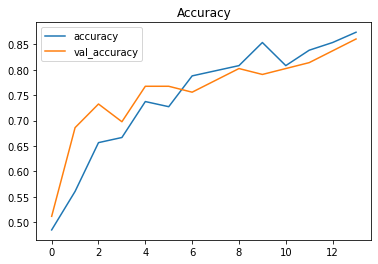

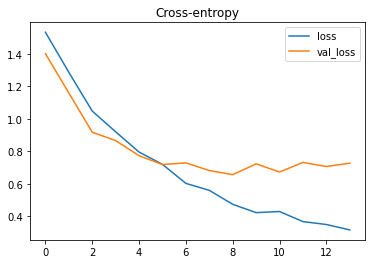

In [34]:
history = model.fit(X_train, y_train, batch_size=20, epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
plt.savefig('Acc.png')
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
plt.savefig('Loss.png')

In [35]:
#model.save('my_model_weights.h5')

In [36]:
#Predict X_test
Prd = model.predict(X_test.values)
pd.DataFrame(Prd)

,0,1,2,3,4
0,0.793514,0.014579,1.100282e-01,0.047350,0.034529
1,0.000413,0.000880,7.357004e-05,0.119205,0.879429
2,0.052516,0.264537,8.525873e-03,0.671769,0.002653
3,0.270568,0.142552,1.342931e-01,0.449120,0.003467
4,0.229621,0.218880,2.661544e-01,0.284260,0.001084
...,...,...,...,...,...
81,0.967087,0.000511,3.051539e-02,0.001673,0.000213
82,0.000004,0.000002,3.571853e-07,0.001597,0.998397
83,0.157323,0.145708,2.269707e-02,0.669078,0.005194
84,0.000200,0.007813,2.324509e-05,0.989800,0.002164


In [37]:
Predict = np.argmax(Prd,axis=1)
Actual = np.argmax(y_test.values,axis=1)

In [38]:
Predict

array([0, 4, 3, 3, 3, 3, 0, 0, 3, 3, 4, 0, 3, 3, 4, 0, 0, 3, 2, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 4, 4, 0, 0, 3, 3, 0, 3, 4, 3, 3, 3,
       4, 3, 3, 4, 0, 0, 4, 4, 0, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 0, 2, 0,
       3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 0, 2, 3, 3, 3, 0, 4, 3, 3, 3],
      dtype=int64)

In [39]:
Actual 

array([0, 4, 3, 0, 0, 3, 0, 0, 1, 1, 4, 0, 1, 3, 4, 0, 0, 3, 2, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 4, 0, 0, 3, 1, 0, 3, 4, 3, 3, 3,
       4, 3, 3, 3, 0, 0, 4, 4, 3, 1, 2, 0, 3, 3, 0, 0, 2, 3, 3, 0, 0, 2,
       3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 2, 3, 3, 3, 0, 4, 3, 1, 3],
      dtype=int64)

In [40]:
sum(Predict==Actual)

69

In [42]:
69/86

0.8023255813953488